In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#  데이터 로드
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# 클래스 이름 (Fashion MNIST 10개)
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

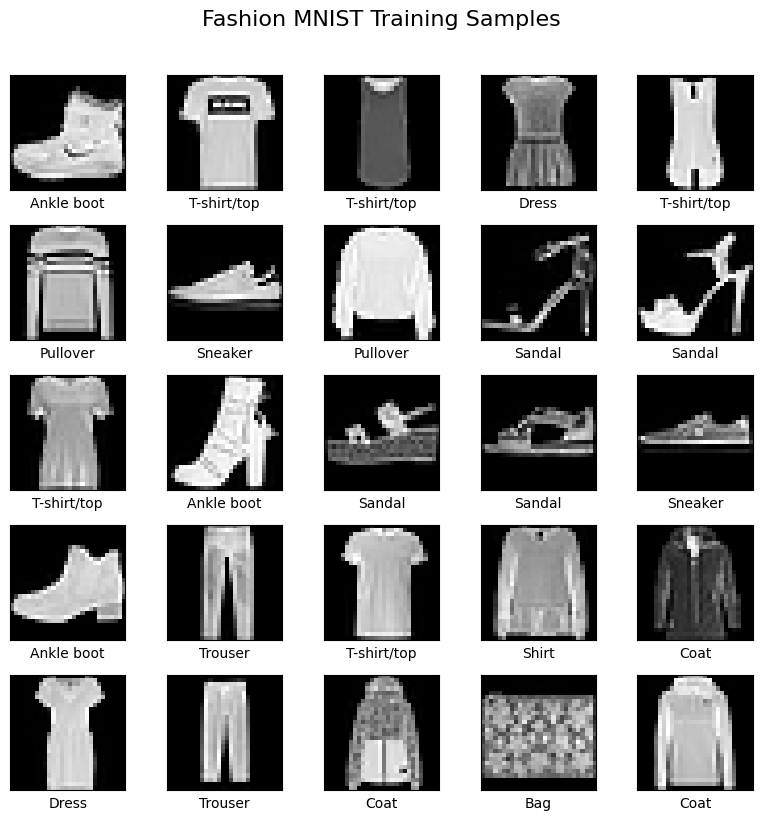

In [4]:
# 훈련 데이터 중 일부 시각화
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.suptitle("Fashion MNIST Training Samples", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [5]:
#  정규화
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# 채널 차원 추가 (np.expand_dims 이용)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)  # (60000, 28, 28, 1)
print("x_test shape:", x_test.shape)    # (10000, 28, 28, 1)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [7]:
#  CNN 모델 구성
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# 학습
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
422/422 - 12s - 28ms/step - accuracy: 0.7670 - loss: 0.6277 - val_accuracy: 0.8473 - val_loss: 0.4058
Epoch 2/10
422/422 - 2s - 4ms/step - accuracy: 0.8532 - loss: 0.4032 - val_accuracy: 0.8738 - val_loss: 0.3427
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.8741 - loss: 0.3439 - val_accuracy: 0.8772 - val_loss: 0.3259
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.8868 - loss: 0.3083 - val_accuracy: 0.8903 - val_loss: 0.2852
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.8949 - loss: 0.2844 - val_accuracy: 0.8928 - val_loss: 0.2825
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.9000 - loss: 0.2687 - val_accuracy: 0.8970 - val_loss: 0.2764
Epoch 7/10
422/422 - 2s - 4ms/step - accuracy: 0.9076 - loss: 0.2476 - val_accuracy: 0.8985 - val_loss: 0.2582
Epoch 8/10
422/422 - 2s - 4ms/step - accuracy: 0.9119 - loss: 0.2388 - val_accuracy: 0.8967 - val_loss: 0.2647
Epoch 9/10
422/422 - 2s - 4ms/step - accuracy: 0.9167 - loss: 0.2231 - val_accuracy: 0.9083 - val_loss: 0.2431

In [10]:
# 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

313/313 - 2s - 8ms/step - accuracy: 0.9124 - loss: 0.2444

✅ Test Accuracy: 0.9124


In [11]:
# 예측 예시
predictions = model.predict(x_test[:5])
print("예측 결과:", np.argmax(predictions, axis=1))
print("실제 레이블:", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
예측 결과: [9 2 1 1 6]
실제 레이블: [9 2 1 1 6]
